In [191]:
import os
import json
import math
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# NOTE: put this notebook in the same directory as the logs
# Load logs from JSON into list of dictionaries
files = [f for f in os.listdir('.') if os.path.isfile(f)]
print files

['.DS_Store', '.gitignore', '11', '12', 'mouse_movement.ipynb']


In [185]:
# Empty array for all log files
tests = []

# Load in logs
for f in files:
    if f not in ['.DS_Store', '.gitignore','mouse_movement.ipynb']:
        with open(f, 'r') as f:
            data = json.load(f)
            tests.append(data)

In [188]:
# Empty arrays to construct our dataframe (or numpy array)
name = []
device = []
image = []
flag = []
action = []
mouse = []
all_coords = []

# Loop over every test in logs
for test in tests:
    # Loop over every iamge in logs 
    for img in test['experiment']:
        if img['dataType'] == "trial":
            
            # Load relevant data into array
            name.append(test['name'])
            device.append(test['device'])
            image.append(img['trialImage'])
            flag.append(img['flag'])
            action.append(img['action'])
            
            # Get maximum deviation in rotated coordinated 
            coords = get_coords(img['mouse'])
            coords2, max_y = rot_coords(coords)
            
            all_coords.append(coords2)
            mouse.append(max_y)

In [190]:
# Construct a Pandas dataframe in case we want to do maths
df = pd.DataFrame({'name':name, 'image':image, 'flag':flag, 'action':action, 'mouse':mouse, 'device':device})
df.head()

,action,device,flag,image,mouse,name
0,optionB,mouse,None,images/owl/owl5.jpg,17.760061,Brian
1,optionB,mouse,None,images/owl/owl4.jpg,28.909750,Brian
2,optionB,mouse,None,images/owl/owl6.jpg,13.953668,Brian
3,optionB,mouse,None,images/owl/owl2.jpg,20.967816,Brian
4,optionB,mouse,None,images/not_owl/not_owl1.jpg,16.950286,Brian


In [217]:
# To CSV
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M_")
df.to_csv(timestamp + 'logs.csv')

In [175]:
# Function to extract coorinates as 2 x number of steps array
def get_coords(mouse):
    # Empty array
    coords = np.zeros((2, len(mouse)))

    # Load coordinates into array 
    for i, t in enumerate(mouse):
        # Note that becuase web axis are left-down, we invert the y
        coords[0,i] = t['x']
        coords[1,i] = -t['y']

    # Subtract start from all plints to center at 0,0
    x_start, y_start = coords[0,0], coords[1,0]
    coords -= np.array([[x_start],[y_start]])
    
    # Return our coordinate array
    return coords

In [177]:
# Function to rotate coordinates so start and end are on x-axis
def rot_coords(coords):

    # Get start and end for angle
    x_start, y_start = coords[0,0], coords[1,0]
    x_end, y_end = coords[0,-1], coords[1,-1]

    # Some trig to make rotation matrix... SOHCAHTOA! SOHCAHTOA! SOHCAHTOA!
    r = -math.atan2((y_end-y_start),(x_end-x_start))
    R = np.array([[math.cos(r), -math.sin(r)],[math.sin(r), math.cos(r)]])
    
    # Return the rotated coordiantes and the maximnum absolute y value
    rotated = np.matmul(R, coords)
    max_y = np.abs(rotated[1,:]).max()
    
    return rotated, max_y

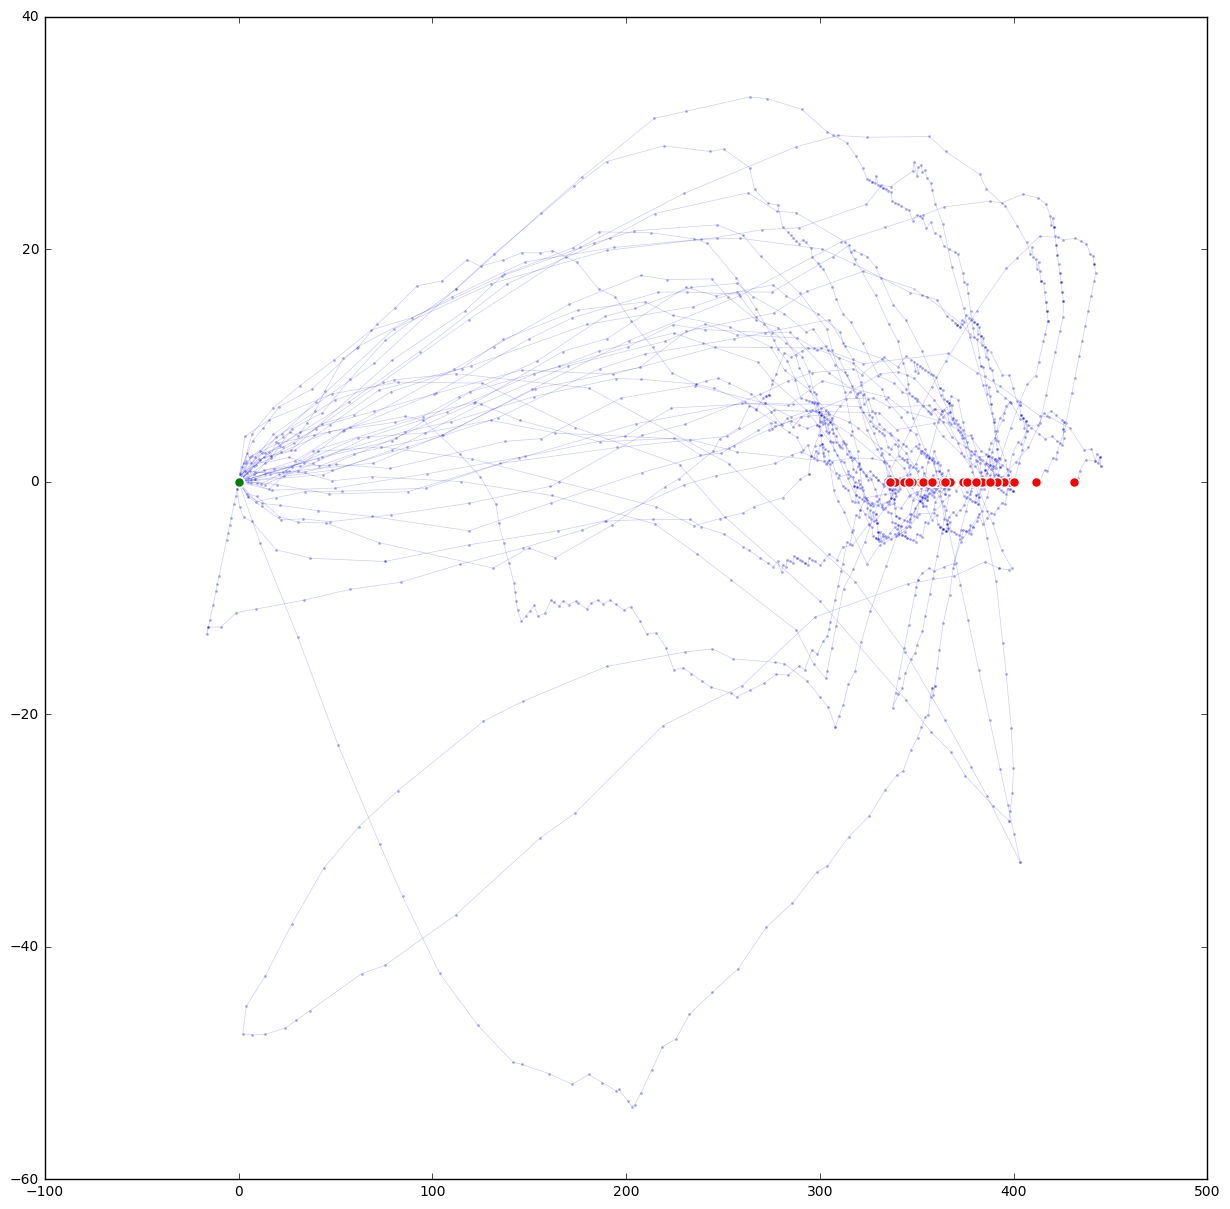

In [179]:
# Plot to check for first user
coords_user = all_coords[:40]

plt.figure(figsize=(15,15))

for coords in coords_user:
    plt.plot(coords[0,:], coords[1,:] , lw = .5, c = 'blue', alpha = 0.2, ms=2, mec='white', marker='o', zorder=1)
    plt.scatter(coords[0,0], coords[1,0], c='green', s=50, lw = 1, edgecolors='white', label='START', zorder=10)
    plt.scatter(coords[0,-1], coords[1,-1], c='red', s=50, lw = 1, edgecolors='white', label='END', zorder=10)

plt.show()
